In [313]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
import seaborn as sns
import sklearn.preprocessing as sp

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [289]:
df = pd.read_csv("./dataset.csv", encoding="shift_jis")

In [290]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [291]:
# Ageの欠損値をそれぞれの敬称の平均値で埋める
df.loc[(df['Name'].str.contains('Mr\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Mr\.')].Age.mean()
df.loc[(df['Name'].str.contains('Mrs\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Mrs\.')].Age.mean()
df.loc[(df['Name'].str.contains('Miss\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Miss\.')].Age.mean()
df.loc[(df['Name'].str.contains('Master\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Master\.')].Age.mean()
df.loc[(df['Name'].str.contains('Dr\.')) & (df['Age'].isnull()), 'Age'] = df[df['Name'].str.contains('Dr\.')].Age.mean()

# Ageがfloatになっているのでintに変換
df = df.astype({'Age':  int})

In [292]:
# 欠損値の確認
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [293]:
# Pclassが1でCabinがA~Gの個数を取得
df_Pclass_Cabin = df[["Pclass", "Cabin"]]
df_Pclass_Cabin_A1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("A"))]
df_Pclass_Cabin_B1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("B"))]
df_Pclass_Cabin_C1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("C"))]
df_Pclass_Cabin_D1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("D"))]
df_Pclass_Cabin_E1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("E"))]
df_Pclass_Cabin_F1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("F"))]
df_Pclass_Cabin_G1 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 1) & (df_Pclass_Cabin["Cabin"].str.contains("G"))]

sum = len(df_Pclass_Cabin_A1)
sum += len(df_Pclass_Cabin_B1)
sum += len(df_Pclass_Cabin_C1)
sum += len(df_Pclass_Cabin_D1)
sum += len(df_Pclass_Cabin_E1)
sum += len(df_Pclass_Cabin_F1)
sum += len(df_Pclass_Cabin_G1)

part_A1 = len(df_Pclass_Cabin_A1) / sum
part_B1 = len(df_Pclass_Cabin_B1) / sum
part_C1 = len(df_Pclass_Cabin_C1) / sum
part_D1 = len(df_Pclass_Cabin_D1) / sum
part_E1 = len(df_Pclass_Cabin_E1) / sum
part_F1 = len(df_Pclass_Cabin_F1) / sum
part_G1 = len(df_Pclass_Cabin_G1) / sum


In [294]:
df_Pclass_Cabin_A2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("A"))]
df_Pclass_Cabin_B2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("B"))]
df_Pclass_Cabin_C2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("C"))]
df_Pclass_Cabin_D2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("D"))]
df_Pclass_Cabin_E2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("E"))]
df_Pclass_Cabin_F2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("F"))]
df_Pclass_Cabin_G2 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 2) & (df_Pclass_Cabin["Cabin"].str.contains("G"))]

sum = len(df_Pclass_Cabin_A2)
sum += len(df_Pclass_Cabin_B2)
sum += len(df_Pclass_Cabin_C2)
sum += len(df_Pclass_Cabin_D2)
sum += len(df_Pclass_Cabin_E2)
sum += len(df_Pclass_Cabin_F2)
sum += len(df_Pclass_Cabin_G2)

part_A2 = len(df_Pclass_Cabin_A2) / sum
part_B2 = len(df_Pclass_Cabin_B2) / sum
part_C2 = len(df_Pclass_Cabin_C2) / sum
part_D2 = len(df_Pclass_Cabin_D2) / sum
part_E2 = len(df_Pclass_Cabin_E2) / sum
part_F2 = len(df_Pclass_Cabin_F2) / sum
part_G2 = len(df_Pclass_Cabin_G2) / sum

In [295]:
df_Pclass_Cabin_A3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("A"))]
df_Pclass_Cabin_B3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("B"))]
df_Pclass_Cabin_C3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("C"))]
df_Pclass_Cabin_D3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("D"))]
df_Pclass_Cabin_E3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("E"))]
df_Pclass_Cabin_F3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("F"))]
df_Pclass_Cabin_G3 = df_Pclass_Cabin[(df_Pclass_Cabin["Pclass"] == 3) & (df_Pclass_Cabin["Cabin"].str.contains("G"))]

sum = len(df_Pclass_Cabin_A3)
sum += len(df_Pclass_Cabin_C3)
sum += len(df_Pclass_Cabin_B3)
sum += len(df_Pclass_Cabin_D3)
sum += len(df_Pclass_Cabin_E3)
sum += len(df_Pclass_Cabin_F3)
sum += len(df_Pclass_Cabin_G3)

part_A3 = len(df_Pclass_Cabin_A3) / sum
part_B3 = len(df_Pclass_Cabin_B3) / sum
part_C3 = len(df_Pclass_Cabin_C3) / sum
part_D3 = len(df_Pclass_Cabin_D3) / sum
part_E3 = len(df_Pclass_Cabin_E3) / sum
part_F3 = len(df_Pclass_Cabin_F3) / sum
part_G3 = len(df_Pclass_Cabin_G3) / sum


In [296]:
def cabin_select(pclass):
    rand = random.uniform(0.0, 1.0)
    if pclass == 1:
        if part_C1 > rand:
            return 'C'
        elif part_B1 > rand:
            return 'B'
        elif part_D1 > rand:
            return 'D'
        elif part_E1 > rand:
            return 'E'
        else:
            return 'A'
            
    elif pclass == 2:
        if part_F2 > random.uniform(0.0, 1.0):
            return 'F'
        elif part_E2 > random.uniform(0.0, 1.0):
            return 'D'
        else:
            return 'E'
    
    elif pclass == 3:
        if part_G3 > random.uniform(0.0, 1.0):
            return 'F'
        elif part_F3 > random.uniform(0.0, 1.0):
            return 'D'
        else:
            return 'E'

In [297]:
#部屋番号を整形し、ランダムに補完
for i in df.index:
    if (df.iat[i, 2] == 1) & (df.iat[i, 10] is np.nan):
        df.iat[i, 10] = cabin_select(1)
    elif (df.iat[i, 2] == 2) & (df.iat[i, 10] is np.nan):
        df.iat[i, 10] = cabin_select(2)
    elif (df.iat[i, 2] == 3) & (df.iat[i, 10] is np.nan):
        df.iat[i, 10] = cabin_select(3)


    

In [298]:
df.loc[(df['Cabin'].str.contains('A',  na=False)), 'Cabin'] = 0
df.loc[(df['Cabin'].str.contains('B',  na=False)), 'Cabin'] = 1
df.loc[(df['Cabin'].str.contains('C',  na=False)), 'Cabin'] = 2
df.loc[(df['Cabin'].str.contains('D',  na=False)), 'Cabin'] = 3
df.loc[(df['Cabin'].str.contains('E',  na=False)), 'Cabin'] = 4
df.loc[(df['Cabin'].str.contains('F',  na=False)), 'Cabin'] = 5
df.loc[(df['Cabin'].str.contains('G',  na=False)), 'Cabin'] = 6

In [299]:
# Embarkedの欠損値を最頻値で置換
print(df["Embarked"].mode())
df["Embarked"].fillna("S", inplace=True)

0    S
dtype: object


In [300]:
# 欠損値の確認
df.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

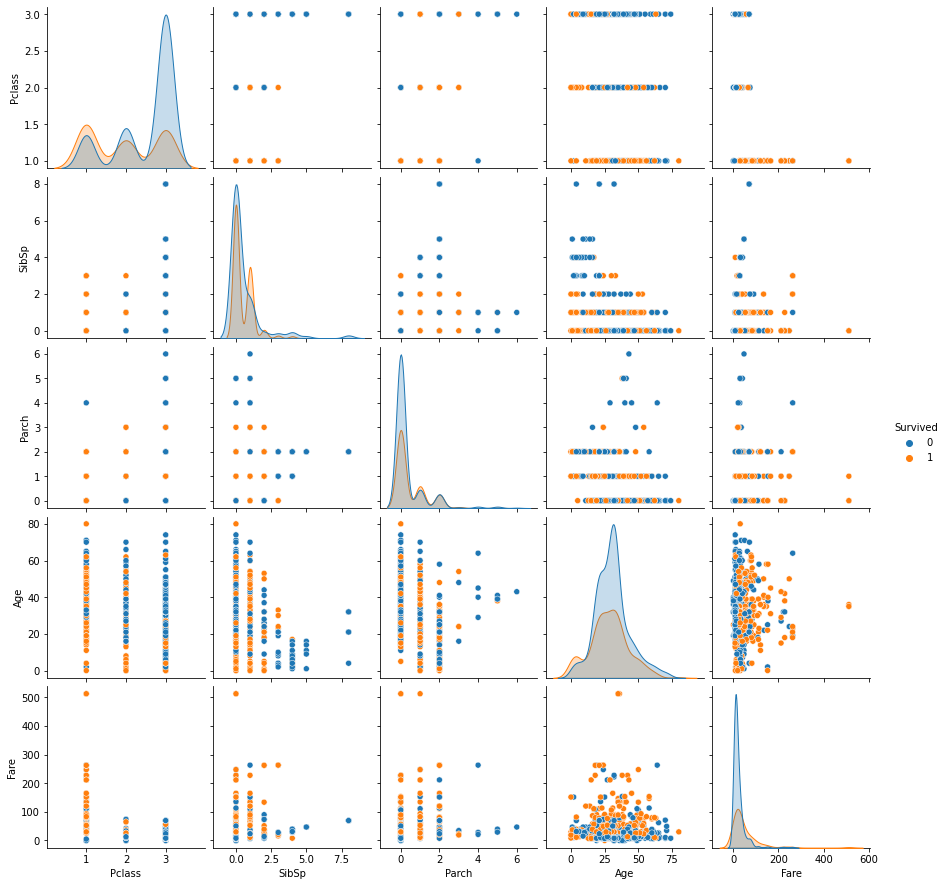

In [301]:
sns.pairplot(df[["Survived", "Pclass", "SibSp", "Parch", "Age", "Fare"]], hue="Survived")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


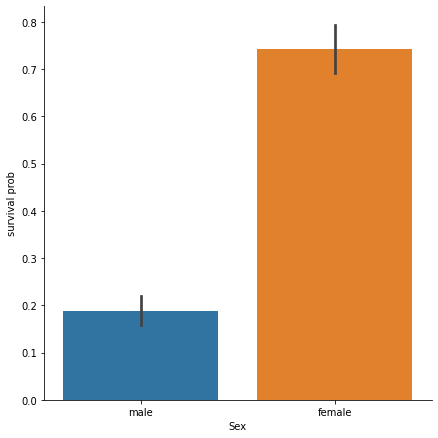

In [302]:
# 性別と生存率の確認
s_s = sns.factorplot(x="Sex",y="Survived", data=df, kind="bar", size = 6 )
s_s = s_s.set_ylabels("survival prob")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


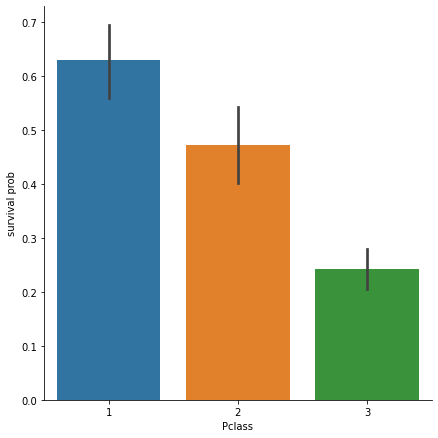

In [303]:
c_s = sns.factorplot(x="Pclass",y="Survived", data=df, kind="bar", size = 6 )
c_s = c_s.set_ylabels("survival prob")
plt.show()

In [304]:
#性別の数値変換
df.loc[(df['Sex'] == 'male'), 'Sex'] = 0
df.loc[(df['Sex'] == 'female'), 'Sex'] = 1

In [305]:
#Embarkedの数値変換
df.loc[(df['Embarked'] == 'S'), 'Embarked'] = 0
df.loc[(df['Embarked'] == 'C'), 'Embarked'] = 1
df.loc[(df['Embarked'] == 'Q'), 'Embarked'] = 2

In [306]:
df = df.astype({'Sex': int, 'Embarked': int})

In [307]:
# trainとtestの分割（後ろ150個をテストデータとする）
df_train, df_test = train_test_split(df, test_size=150,  shuffle=False)

In [308]:
features = ["Pclass", "Sex", "Age"]
x_train = df_train[features]
print(x_train)

     Pclass  Sex  Age
0         3    0   22
1         1    1   38
2         3    1   26
3         1    1   35
4         3    0   35
..      ...  ...  ...
736       3    1   48
737       1    0   35
738       3    0   32
739       3    0   32
740       1    0   32

[741 rows x 3 columns]


In [309]:
y_train = df_train['Survived']

In [311]:
# 学習用セットと検証用セットに分割
random_seed = 1
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.5, random_state = random_seed)

In [314]:
# 学習に関するパラメータ設定
params = {
    "n_estimators" : [2, 5, 10, 15, 20, 30, 50, 75, 100, 200, 500, 1000],
    "criterion" : ["gini"],
    "min_samples_split" : [2, 3, 5, 10, 15, 20, 30],
    "max_depth" : [2, 3, 5, 10, 15, 20, 30],
    "random_state" : [1],
    "verbose" : [False],
}

# モデル構築
model = GridSearchCV(RandomForestClassifier(), params, cv = 3)
model = model.fit(X_train, Y_train)
model = model.best_estimator_

# 検証用セットを用いて評価
model.score(X_val, Y_val)

0.7951482479784366

In [281]:
# df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare'],axis=1)
# train_X = df.drop('Survived', axis=1)
# train_y = df.Survived
# (train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

In [282]:
# PassengerId    0
# Survived       0
# Pclass         0
# Name           0
# Sex            0
# Age            0
# SibSp          0
# Parch          0
# Ticket         0
# Fare           0
# Cabin          0
# Embarked       0

In [283]:
# #ランダムフォレスト
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=0)
# clf = clf.fit(train_X, train_y)
# pred = clf.predict(test_X)
# fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
# auc(fpr, tpr)
# accuracy_score(pred, test_y)